# Feature Selection - Wrapper Method - Step Forward, Backward and Exhaustive

### Wrapping method

#### Uses of Wrapping method
 - Use combinations of variables to determine predictive power.
 - To find the best combination of variables.
 - Computationally expensive than filter method.
 - To perform better than filter method.
 - Not recommended on high number of features.

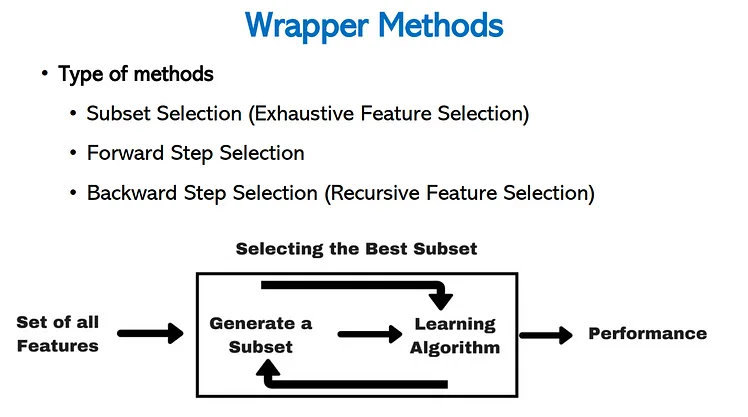

#### Forward Step Selection
In this wrapping method, it selects one best feature every time and finally it combines all the best features for the best accuracy.

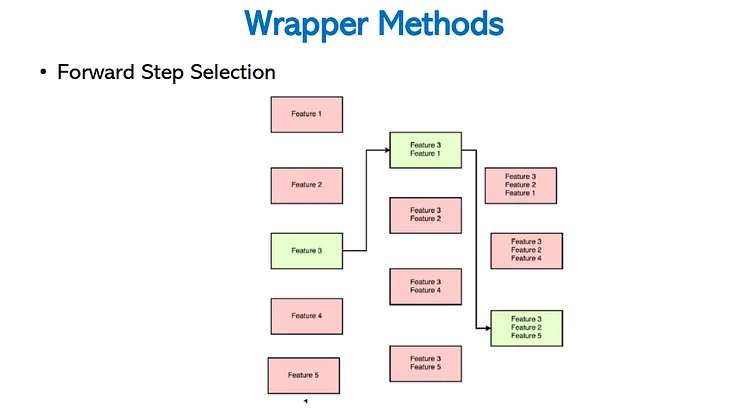

#### Backward Step Selection
It is reverse process of Forward Step Selection method, intially it takes all the features and remove one by one every time. Finally it left with required number of features for the best accuracy.

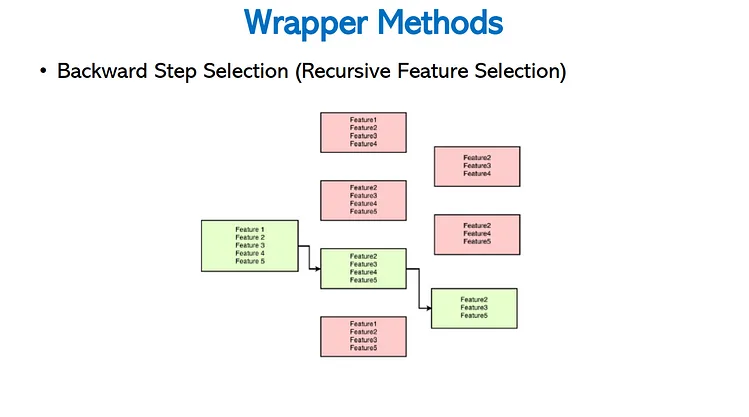

#### Exhaustive Feature Selection
 - It is also called as subset selection method.
 - It fits the model with each possible combinations of N features. 
 #### ( y = B0, y = B0 + B1.X1, y = C0 + C1.X2 )


 - It requires massive computational power.
 - It uses test error to evaluate model performance.

#### Drawback
It is a slower method compared to step forward and back ward methods.

#### How it works
Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d.

In a nutshell, SFAs remove or add one feature at the time based on the classifier performance until a feature subset of the desired size k is reached. There are 4 different flavors of SFAs available via the SequentialFeatureSelector:

 - Sequential Forward Selection (SFS)
 - Sequential Backward Selection (SBS)
 - Sequential Forward Floating Selection (SFFS)
 - Sequential Backward Floating Selection (SBFS)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [ ]:
data = load_wine()

In [ ]:
data.keys()

In [ ]:
print(data.DESCR)

In [ ]:
x = pd.DataFrame(data.data)
y = data.target

In [ ]:
x.columns = data.feature_names
x.head()

In [ ]:
x.isnull().sum()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
x_train.shape, x_test.shape

### Step Forward Feature Selection (SFS)

In [ ]:
# Training with 6 Features instead of Original 13 features to test the model.
sfs = SFS(
    RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
    k_features=6,
    forward=True,
    floating=False,
    verbose=2,
    scoring="accuracy",
    cv=4,
    n_jobs=-1,
).fit(x_train, y_train)

As we can see the maximum accuracy is when using the 3 features and then it started going down again. You can also try it by adding all 13 features and see the difference, as below.

In [ ]:
# Training with Original 13 features to test the model.
sfs = SFS(
    RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
    k_features=13,
    forward=True,
    floating=False,
    verbose=2,
    scoring="accuracy",
    cv=4,
    n_jobs=-1,
).fit(x_train, y_train)

In [ ]:
# Checking which features are selected.
sfs.k_feature_names_

In [ ]:
# Checking which features ids are selected.
sfs.k_feature_idx_

In [ ]:
# K Score
sfs.k_score_

In [ ]:
# Looking at how the processing was done.
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [ ]:
# Finding best features between 1 to 8.
sfs = SFS(
    RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
    k_features=(1, 8),
    forward=True,
    floating=False,
    verbose=2,
    scoring="accuracy",
    cv=4,
    n_jobs=-1,
).fit(x_train, y_train)

In [ ]:
sfs.k_score_

In [ ]:
sfs.k_feature_names_

## Step Backward Selection (SBS)

In [ ]:
sbs = SFS(
    RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
    k_features=(1, 8),
    forward=False,
    floating=False,
    verbose=2,
    scoring="accuracy",
    cv=4,
    n_jobs=-1,
).fit(x_train, y_train)

In [ ]:
sbs.k_score_

Here we can see we get the same accuracy whether going froward or backward.

In [ ]:
sbs.k_feature_names_

## Exhaustive Feature Selection

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [ ]:
efs = EFS(
    RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=1),
    min_features=4,
    max_features=5,
    scoring="accuracy",
    cv=None,
    n_jobs=-1,
).fit(x_train, y_train)

In [ ]:
help(efs)

In [ ]:
efs.best_score_

In [ ]:
efs.best_feature_names_

In [ ]:
efs.best_idx_

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [ ]:
plot_sfs(efs.get_metric_dict(), kind="std_dev")